In [126]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score


In [127]:
#load the datset
df = pd.read_csv('/content/StudentsPerformance.csv')

In [128]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [129]:
#Data Cleaning
# Check for missing values
missing = df.isnull().sum()

In [130]:
# Check for duplicates
dupl = df.duplicated().sum()

In [131]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [132]:
# Create a target variable 'pass/fail' - threshold: average score >= 40 is pass
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0)  # 1 = pass, 0 = fail

In [133]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,pass
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,1
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,1
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,1
998,female,group D,some college,standard,completed,68,78,77,74.333333,1


In [134]:
summary = {
    'Missing Values': missing.sum(),
    'Duplicate Rows': dupl,
    'New Columns': df[['average_score', 'pass']].head()
}
print(summary)


{'Missing Values': np.int64(0), 'Duplicate Rows': np.int64(0), 'New Columns':    average_score  pass
0      72.666667     1
1      82.333333     1
2      92.666667     1
3      49.333333     1
4      76.333333     1}


In [135]:
# Set visual style
sns.set(style="whitegrid")

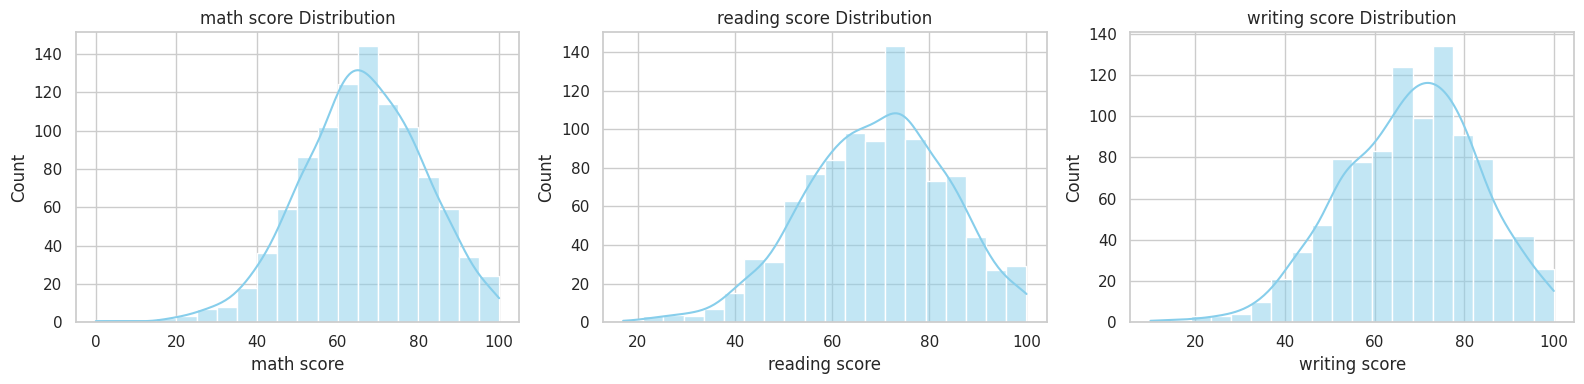

In [136]:
# Distribution of individual scores
plt.figure(figsize=(16, 4))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[subject], kde=True, bins=20, color='skyblue')
    plt.title(f'{subject} Distribution')
plt.tight_layout()
plt.show()

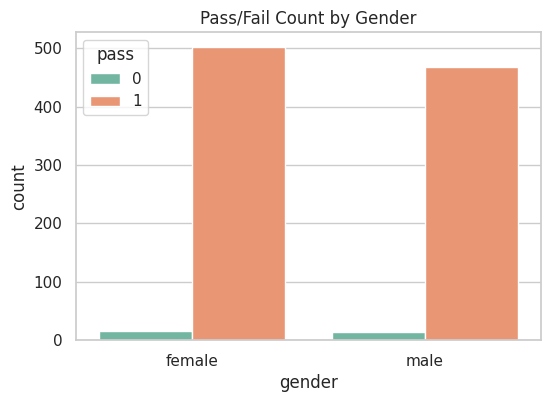

In [137]:
# Pass rate by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='pass', data=df, palette='Set2')
plt.title('Pass/Fail Count by Gender')
plt.show()

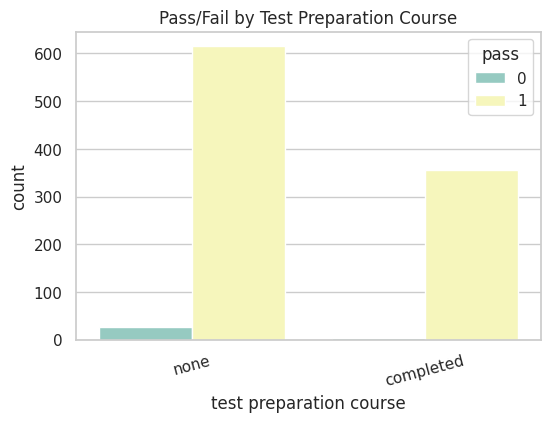

In [138]:
# Pass rate by test preparation course
plt.figure(figsize=(6, 4))
sns.countplot(x='test preparation course', hue='pass', data=df, palette='Set3')
plt.title('Pass/Fail by Test Preparation Course')
plt.xticks(rotation=15)
plt.show()

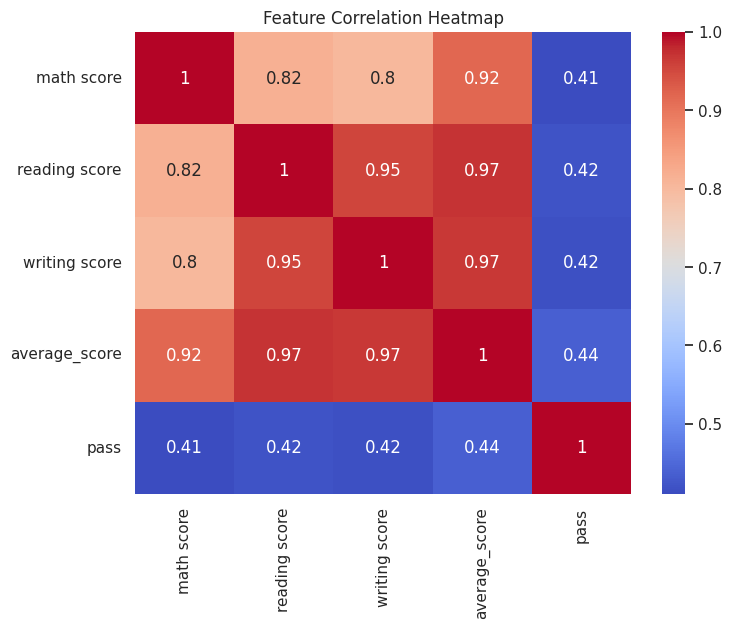

In [139]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['math score', 'reading score', 'writing score', 'average_score', 'pass']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [140]:
#Encode categorical features
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [141]:
#Define features and target
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course',
            'math score', 'reading score', 'writing score']
X = df_encoded[features]
y = df_encoded['pass']

In [142]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
#Train models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)

In [144]:
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [145]:
#Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [156]:
#Evaluation
results = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_logreg),
        'F1 Score': f1_score(y_test, y_pred_logreg),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_logreg)
    },

    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_rf)
    }
}

In [157]:
results

{'Logistic Regression': {'Accuracy': 1.0,
  'F1 Score': 1.0,
  'Confusion Matrix': array([[ 10,   0],
         [  0, 190]])},
 'Random Forest': {'Accuracy': 1.0,
  'F1 Score': 1.0,
  'Confusion Matrix': array([[ 10,   0],
         [  0, 190]])}}

#Comparison on both's accuracy

In [162]:
from sklearn.metrics import classification_report

# Logistic Regression Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Random Forest Evaluation
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 10   0]
 [  0 190]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Random Forest:
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 10   0]
 [  0 190]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00       190

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [164]:
# Create a dictionary to store the data
data = {'Model': ['Logistic Regression', 'Random Forest'],
        'Accuracy': [logistic_accuracy, rf_accuracy],
        'Confusion Matrix': [logistic_confusion_matrix, rf_confusion_matrix]}
print(data)

{'Model': ['Logistic Regression', 'Random Forest'], 'Accuracy': [0.945, 1.0], 'Confusion Matrix': [array([[  0,  10],
       [  1, 189]]), array([[ 10,   0],
       [  0, 190]])]}


In [165]:
# Create a pandas DataFrame
evaluation_table = pd.DataFrame(data)

In [166]:
print(evaluation_table)

                 Model  Accuracy     Confusion Matrix
0  Logistic Regression     0.945  [[0, 10], [1, 189]]
1        Random Forest     1.000  [[10, 0], [0, 190]]


Text(0, 0.5, 'Accuracy')

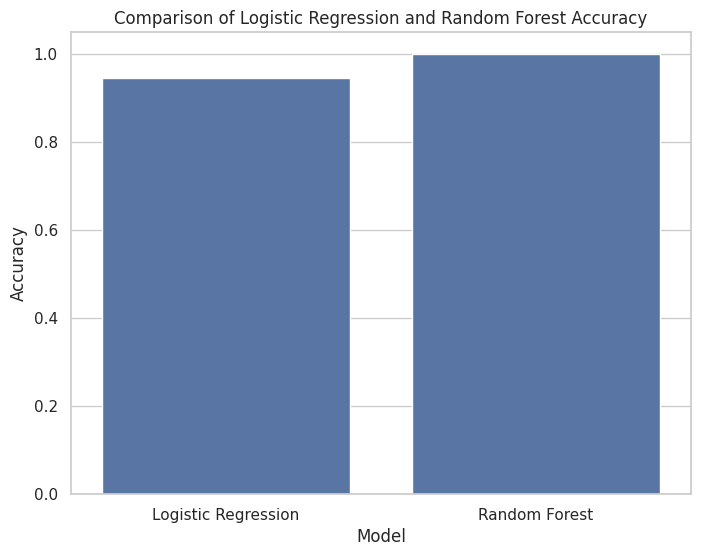

In [167]:
#Visualisation of both accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=evaluation_table)
plt.title('Comparison of Logistic Regression and Random Forest Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

In [152]:
# Python + Machine Learning – Steps Overview
# Load the Dataset
  # Load the student performance dataset into a DataFrame for analysis.

# Data Cleaning

  # Check for missing values and duplicates.

  # Drop unnecessary rows or columns if needed.

  # Create a new column average_score (mean of math, reading, writing scores).

  # Create a target column pass (1 if average score ≥ 40, else 0).

# Exploratory Data Analysis (EDA)

# Plot distributions of scores using histograms.

# Use count plots to compare pass/fail rates across gender, race, and test prep status.

# Generate a heatmap to visualize feature correlations.

# Feature Encoding

# Convert categorical features (like gender, race/ethnicity, lunch type) into numerical format using label encoding.

# Model Building

# Split the data into training and testing sets.

# Train two classification models: Logistic Regression and Random Forest.

# Use selected features to predict whether a student will pass.

# Model Evaluation

  # Evaluate both models using accuracy, confusion matrix, F1-score, and classification report.

  # Compare both models and choose the better one for final use.

